In [8]:
import numpy as np
import pandas as pd
detailed = pd.read_csv('./outputs/insta_detailed.csv')

In [9]:
detailed.drop(['Unnamed: 0'], axis = 1 , inplace = True)
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


### likes column
* issue1: has unknown values
* issue2: object datatype

In [10]:
detailed['likes'].unique()

array([34874, 32651, 28240, 21630, 27116, 52240, 22329, 24239, 52132,
        6140, 53115,  8083, 66684, 19311, 22414, 37398, 32824,  9378,
       46368,  7748,  6340,  7663,  7730, 11920, 13543, 14304, 20859,
        6886, 13165,   873, 10223, 16288,  3628,  7327, 12760,  6040,
        7387, 23699, 33257, 17078, 21943, 21373,  8058,  7788, 15393,
       15543, 15531, 14434, 23496, 25290, 23144, 14800, 14991, 20703,
       17490, 16667,  1015,   480,   996,   580,   971,   373,  1945,
        1407,   648,  1618,   929,  1934,  1096,  1483,  1553,  1772,
        1183,  1453,  1651,  1437,  2357,  1990,  1944,  1578,  1620,
        1134,  2706,  1408,  2802,  1544,  1211,  1378,  9566,  1540,
        1688,  5163,  2164,  2353,  3653, 12987,  3771,  1902,  5463,
        2467, 20119,  3842,  4296,  2645,  4405,  9447,  8098,  2634,
         975,  1972,   994,  1028,  2362,  1817,  1963,  1424,  2056,
        4680,  3582,  2066,  3672,  4079,  3287,  2415,  4290,  8119,
        5653,  5015,

In [11]:
(detailed['likes'] == 'unknown').sum()

0

<AxesSubplot:>

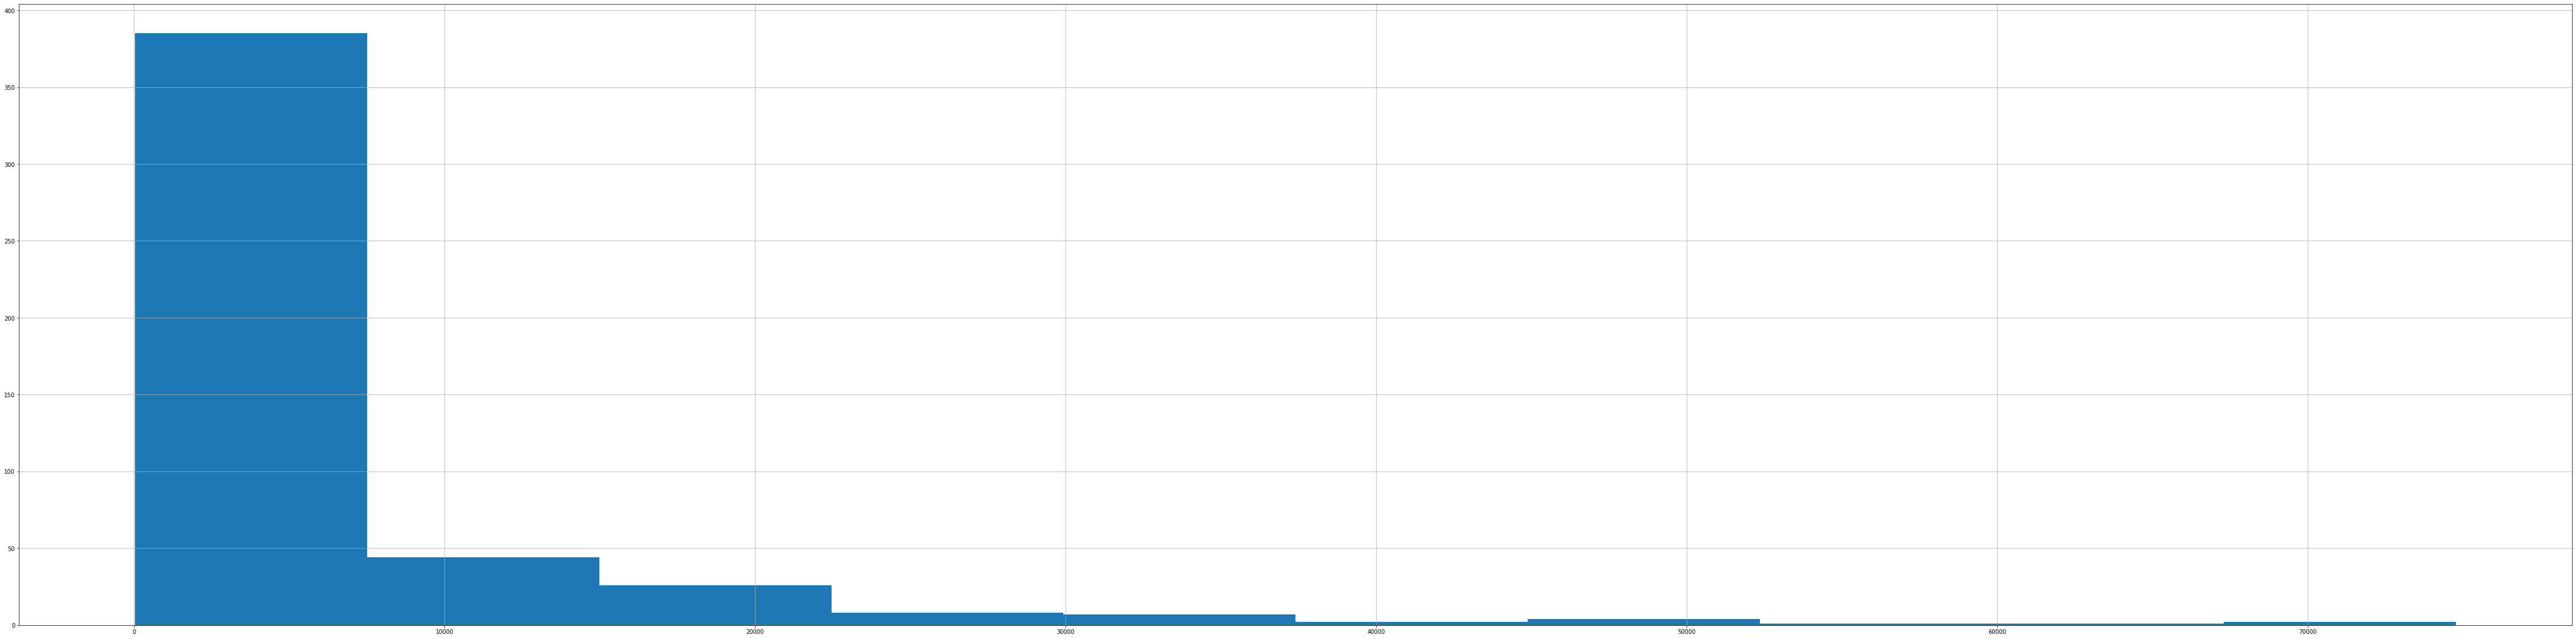

In [12]:
detailed['likes'].hist(figsize=(80,20))

* solution1: replace unknown with median

In [13]:
likes = detailed['likes'].values

In [14]:
#median likes for each user
median = []
for i in range(0,len(likes),20):
    data = []
    for j in range(i, i+20):
        try:
            data.append(int(likes[j]))
        except:
            continue
    median.append(int(np.median(data)))

In [15]:
for i in range(len(likes)):
    if likes[i] == 'unknown':
        j = int(i/20)
        likes[i] = median[j]

In [16]:
(detailed['likes'] == 'unknown').sum()

0

* solution2: convert to int

In [17]:
detailed['likes'] = detailed['likes'].astype(str).astype(int)

In [18]:
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


### datetime column
* extraxt date and time from datetime column

In [ ]:
date = []
time = []
for i in range(detailed['datetimes'].shape[0]):
    date.append(detailed['datetimes'][i].split('T')[0])
    time.append(detailed['datetimes'][i].split('T')[1].split('.')[0])

In [ ]:
detailed['date'] = date
detailed['time'] = time

In [176]:
# drop datetime
detailed.drop(['datetimes'] , axis = 1,inplace = True)

In [22]:
# check
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


### captions column
* has null values

In [23]:
detailed['captions'] = detailed['captions'].fillna('empty caption')

In [24]:
#check
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  480 non-null    object
 1   post      480 non-null    object
 2   likes     480 non-null    int64 
 3   type      480 non-null    object
 4   captions  480 non-null    object
 5   date      480 non-null    object
 6   time      480 non-null    object
dtypes: int64(1), object(6)
memory usage: 26.4+ KB


In [25]:
detailed

,username,post,likes,type,captions,date,time
0,sarahh.hany,https://www.instagram.com/p/CcTVHc6gOro/,34874,clip,Negative Self Talk !,2022-04-13,18:55:14
1,sarahh.hany,https://www.instagram.com/p/CcS5ECgABzx/,32651,clip,Styling my New shirt from Stradivarius 💭,2022-04-13,14:51:13
2,sarahh.hany,https://www.instagram.com/p/CcQjcnYsAWF/,28240,clip,Outfit ideas 🖤,2022-04-12,17:04:57
3,sarahh.hany,https://www.instagram.com/p/CcQSpf5gBJv/,21630,clip,ازاي نحاول نتخلص من الشعور السئ او ال bad mood,2022-04-12,14:46:09
4,sarahh.hany,https://www.instagram.com/p/CcOASy6g3Tq/,27116,clip,Enjoy your own company!,2022-04-11,17:17:21
...,...,...,...,...,...,...,...
475,yomnasfood,https://www.instagram.com/p/CXV834nN_lz/,20714,photo,First time to post a regular photo of me😳👉🏼👈🏼,2021-12-11,12:43:30
476,yomnasfood,https://www.instagram.com/p/CWn7beKF_LB/,47631,clip,The most requested video ever😳 here’s how i ma...,2021-11-23,15:46:53
477,yomnasfood,https://www.instagram.com/p/CWWIb19F4TW/,14293,clip,Milk bread 🍞\nRecipe:\n- 2 1/2 cups flour/ ٢ ك...,2021-11-16,17:57:26
478,yomnasfood,https://www.instagram.com/p/CWBZ_kIlicj/,7297,clip,تقريبا دي اكتر حاجة انا متحمسالها في شهر نوڤمب...,2021-11-08,16:42:58


### date column
* datatype is object

In [26]:
detailed['date']= pd.to_datetime(detailed['date'])

In [27]:
#check
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   username  480 non-null    object        
 1   post      480 non-null    object        
 2   likes     480 non-null    int64         
 3   type      480 non-null    object        
 4   captions  480 non-null    object        
 5   date      480 non-null    datetime64[ns]
 6   time      480 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 26.4+ KB


### posts column
* replace ',' with ''

In [29]:
general = pd.read_csv('./outputs/insta_general.csv')

In [30]:
general['posts']= general['posts'].astype('string').str.replace(',','').astype('int')

In [31]:
general.posts.unique()

array([ 975,  471,  355, 2937,  151,  342,   90,  866, 1030,  186, 1160,
       1366,  210,   52,  148,  200,  392,  267, 2149, 1362,  252,  647])

### followers/followings columns
* to int

In [34]:
general['followers']= general['followers'].astype('int')
general['followings']= general['followings'].astype('int')

## Feature Extraction
* Engagement rate
* avg ER
* total likes per username

In [35]:
user = detailed['username'][detailed['likes'] == likes[10]]
user

10    sarahh.hany
Name: username, dtype: object

In [36]:
users = general['username'].values

In [37]:
user_followers = {}
for i in range(len(users)):
    user_followers[users[i]] = general['followers'][users == users[i]][i]
    #followers.append(general['followers'][users == users[i]][i])

In [38]:
user_followers

{'sarahh.hany': 689000,
 'fatimabadawyy': 175000,
 'lailaaezzat': 165000,
 'habiba.gadalla': 20300,
 'withhags': 44200,
 'youssraelgamal': 202000,
 'self_theblog': 39200,
 'dressupwithjay': 79600,
 'jehadkhaled_': 16200,
 'manarhosem': 13900,
 '100looks_': 89800,
 'ayaabdelhamid': 432000,
 'dianafaaberg': 40500,
 'sarah_ihab_fitness': 37600,
 'farah_elwardany': 1942,
 'yomnasfood': 195000,
 'samarasfood': 39300,
 'malaksfoodjourney': 78600,
 'saraahmedxxo': 971,
 'salmaelkashef': 119000,
 'laylaghaleb': 274000,
 'samaawithcup': 14900,
 'sarahtaibah': 46800}

In [39]:
detailed

,username,post,likes,type,captions,date,time
0,sarahh.hany,https://www.instagram.com/p/CcTVHc6gOro/,34874,clip,Negative Self Talk !,2022-04-13,18:55:14
1,sarahh.hany,https://www.instagram.com/p/CcS5ECgABzx/,32651,clip,Styling my New shirt from Stradivarius 💭,2022-04-13,14:51:13
2,sarahh.hany,https://www.instagram.com/p/CcQjcnYsAWF/,28240,clip,Outfit ideas 🖤,2022-04-12,17:04:57
3,sarahh.hany,https://www.instagram.com/p/CcQSpf5gBJv/,21630,clip,ازاي نحاول نتخلص من الشعور السئ او ال bad mood,2022-04-12,14:46:09
4,sarahh.hany,https://www.instagram.com/p/CcOASy6g3Tq/,27116,clip,Enjoy your own company!,2022-04-11,17:17:21
...,...,...,...,...,...,...,...
475,yomnasfood,https://www.instagram.com/p/CXV834nN_lz/,20714,photo,First time to post a regular photo of me😳👉🏼👈🏼,2021-12-11,12:43:30
476,yomnasfood,https://www.instagram.com/p/CWn7beKF_LB/,47631,clip,The most requested video ever😳 here’s how i ma...,2021-11-23,15:46:53
477,yomnasfood,https://www.instagram.com/p/CWWIb19F4TW/,14293,clip,Milk bread 🍞\nRecipe:\n- 2 1/2 cups flour/ ٢ ك...,2021-11-16,17:57:26
478,yomnasfood,https://www.instagram.com/p/CWBZ_kIlicj/,7297,clip,تقريبا دي اكتر حاجة انا متحمسالها في شهر نوڤمب...,2021-11-08,16:42:58


In [40]:
likes = detailed['likes'].values.tolist()

In [41]:
detailed[detailed['likes'] == detailed['likes'].iloc[j]]['username'][j]

'yomnasfood'

In [ ]:
er = []
avg_er = []
for i in range(0,len(likes),20):
    d = int(i/20)
    for j in range(i, i+20):
        user = detailed[detailed['likes'] == detailed['likes'].iloc[j]]['username'][j]
        er.append((likes[j]/user_followers[user])*100)
    avg_er.append((sum(er[i:i+20]))/20)

In [213]:
detailed['engagement_rate'] = er

In [214]:
avg_er_detailed = []
for e in avg_er:
    avg_er_detailed.extend([e]*20)

In [215]:
detailed['avg_engagement_rate'] = avg_er_detailed

In [216]:
general['avg_engagement_rate'] = avg_er

In [217]:
general.drop(12, axis=0, inplace = True)

In [218]:
detailed.drop(range(240,260), inplace = True)

In [219]:
general = general.reset_index()
detailed = detailed.reset_index()

In [220]:
total_likes = detailed.groupby(["username"])["likes"].sum()

In [221]:
tot_likes = []
for name in general['username'].values:
    tot_likes.append(total_likes[name])

In [222]:
general['total likes'] = tot_likes

array([ 975,  471,  355, 2937,  151,  342,   90,  866, 1030,  186, 1160,
       1366,  210,   52,  148,  200,  392,  267, 2149, 1362,  252,  647])

In [236]:
general.to_csv('./outputs/insta_general.csv', index=False)

In [224]:
detailed.to_csv('./outputs/insta_detailed_processed.csv', index=False)

In [227]:
detailed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                460 non-null    int64         
 1   username             460 non-null    object        
 2   post                 460 non-null    object        
 3   likes                460 non-null    int64         
 4   type                 460 non-null    object        
 5   captions             460 non-null    object        
 6   date                 460 non-null    datetime64[ns]
 7   time                 460 non-null    object        
 8   engagement_rate      460 non-null    float64       
 9   avg_engagement_rate  460 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 36.1+ KB
